# Synthetic data examples

In this Notebook we will build synthetic data suitable to Alphalens analysis. This is useful to understand how Alphalens expects the input to be formatted and also it is a good testing environment to experiment with Alphalens.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy import nan
from pandas import (DataFrame, date_range)

from alphalens.tears import (create_returns_tear_sheet,
                      create_information_tear_sheet,
                      create_turnover_tear_sheet,
                      create_summary_tear_sheet,
                      create_full_tear_sheet,
                      create_event_returns_tear_sheet,
                      create_event_study_tear_sheet)

from alphalens.utils import get_clean_factor_and_forward_returns

In [2]:
#
# build price
#
price_index = date_range(start='2015-1-10', end='2015-2-28')
price_index.name = 'date'
tickers = ['A', 'B', 'C', 'D', 'E', 'F']
data = [[1.0025**i, 1.005**i, 1.00**i, 0.995**i, 1.005**i, 1.00**i]
        for i in range(1, 51)]
base_prices = DataFrame(index=price_index, columns=tickers, data=data)

#
# build factor
#
factor_index = date_range(start='2015-1-15', end='2015-2-13')
factor_index.name = 'date'
factor = DataFrame(index=factor_index, columns=tickers,
                   data=[[3, 4, 2, 1, nan, nan], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2]])
factor_groups = {'A': 'Group1', 'B': 'Group2', 'C': 'Group1', 'D': 'Group2', 'E': 'Group1', 'F': 'Group2'}

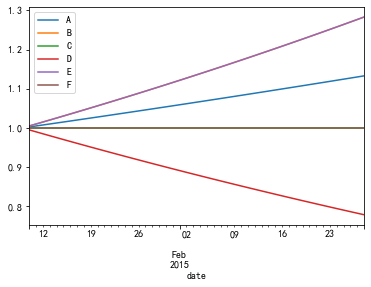

In [3]:
base_prices.plot()
plt.show()

In [4]:
base_prices.head()

,A,B,C,D,E,F
date,,,,,,
2015-01-10,1.002500,1.005000,1.0,0.995000,1.005000,1.0
2015-01-11,1.005006,1.010025,1.0,0.990025,1.010025,1.0
2015-01-12,1.007519,1.015075,1.0,0.985075,1.015075,1.0
2015-01-13,1.010038,1.020151,1.0,0.980150,1.020151,1.0
2015-01-14,1.012563,1.025251,1.0,0.975249,1.025251,1.0


In [5]:
# create artificial intraday prices

today_open = base_prices.copy()
today_open.index += pd.Timedelta('9h30m')

# every day, after 1 hour from open all stocks increase by 0.1%
today_open_1h = today_open.copy()
today_open_1h.index += pd.Timedelta('1h')
today_open_1h += today_open_1h*0.001

# every day, after 3 hours from open all stocks decrease by 0.2%
today_open_3h = today_open.copy()
today_open_3h.index += pd.Timedelta('3h')
today_open_3h -= today_open_3h*0.002

# prices DataFrame will contain all intraday prices
prices = pd.concat([today_open, today_open_1h, today_open_3h]).sort_index()

In [6]:
prices.head(10)

,A,B,C,D,E,F
date,,,,,,
2015-01-10 09:30:00,1.002500,1.005000,1.000,0.995000,1.005000,1.000
2015-01-10 10:30:00,1.003502,1.006005,1.001,0.995995,1.006005,1.001
2015-01-10 12:30:00,1.000495,1.002990,0.998,0.993010,1.002990,0.998
2015-01-11 09:30:00,1.005006,1.010025,1.000,0.990025,1.010025,1.000
2015-01-11 10:30:00,1.006011,1.011035,1.001,0.991015,1.011035,1.001
2015-01-11 12:30:00,1.002996,1.008005,0.998,0.988045,1.008005,0.998
2015-01-12 09:30:00,1.007519,1.015075,1.000,0.985075,1.015075,1.000
2015-01-12 10:30:00,1.008526,1.016090,1.001,0.986060,1.016090,1.001
2015-01-12 12:30:00,1.005504,1.013045,0.998,0.983105,1.013045,0.998


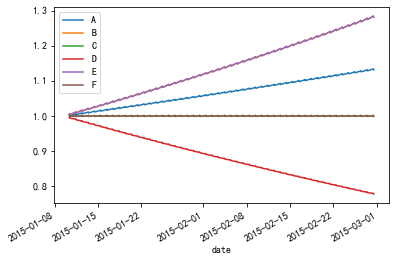

In [7]:
prices.plot()
plt.show()

In [8]:
# Align factor to open price
factor.index += pd.Timedelta('9h30m')
factor = factor.stack()
factor.index = factor.index.set_names(['date', 'asset'])

In [9]:
factor.head(10)

date                 asset
2015-01-15 09:30:00  A        3.0
                     B        4.0
                     C        2.0
                     D        1.0
2015-01-16 09:30:00  A        3.0
                     D        1.0
                     E        4.0
                     F        2.0
2015-01-17 09:30:00  A        3.0
                     B        4.0
dtype: float64

In [10]:
# Period 1: today open to open + 1 hour
# Period 2: today open to open + 3 hours
# Period 3: today open to next day open
# Period 6: today open to 2 days open

factor_data = get_clean_factor_and_forward_returns(
    factor,
    prices,
    groupby=factor_groups,
    quantiles=4,
    periods=(1, 2, 3, 6), 
    filter_zscore=None)

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [11]:
factor_data.head(10)

1h     3h      1D        2D  factor   group  \
date                asset                                                   
2015-01-15 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0  Group1   
                    B      0.001 -0.002  0.0050  0.010025     4.0  Group2   
                    C      0.001 -0.002  0.0000  0.000000     2.0  Group1   
                    D      0.001 -0.002 -0.0050 -0.009975     1.0  Group2   
2015-01-16 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0  Group1   
                    D      0.001 -0.002 -0.0050 -0.009975     1.0  Group2   
                    E      0.001 -0.002  0.0050  0.010025     4.0  Group1   
                    F      0.001 -0.002  0.0000  0.000000     2.0  Group2   
2015-01-17 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0  Group1   
                    B      0.001 -0.002  0.0050  0.010025     4.0  Group2   

                           factor_quantile  
date                asset                   
2015-01-15 09:30:00 A                    3  
                    B                    4  
                    C                    2  
                    D                    1  
2015-01-16 09:30:00 A                    3  
                    D                    1  
                    E                    4  
                    F                    2  
2015-01-17 09:30:00 A                    3  
                    B                    4

# `create_full_tear_sheet`

In [ ]:
create_full_tear_sheet(factor_data, long_short=False, group_neutral=False, by_group=False)

# `create_event_returns_tear_sheet`

In [12]:
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=False, group_neutral=False, by_group=False)

C:\Users\liude\anaconda3\envs\zipline\lib\site-packages\scipy\stats\stats.py:4196: SpearmanRConstantInputWarning:

An input array is constant; the correlation coefficent is not defined.

C:\Users\liude\anaconda3\envs\zipline\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning:

invalid value encountered in less_equal



C:\Users\liude\anaconda3\envs\zipline\lib\site-packages\scipy\stats\_distn_infrastructure.py:1760: RuntimeWarning:

invalid value encountered in true_divide



c:\users\liude\repos\alphalens\alphalens\utils.py:913: UserWarning:

Skipping return periods that aren't exact multiples of days.



                                -3            -2            -1             0  \
factor_quantile                                                                
1               mean   9077.342850  9.086420e+03  9.059188e+03   9031.956136   
                std     400.484068  4.008846e+02  3.996831e+02    398.481647   
2               mean  10000.000000  1.001000e+04  9.980000e+03  10000.000000   
                std       0.000000  4.516810e-12  4.516810e-12      0.000000   
3               mean  10501.391546  1.051189e+04  1.048039e+04  10527.645025   
                std     230.820814  2.310516e+02  2.303592e+02    231.397866   
4               mean  11031.709150  1.104274e+04  1.100965e+04  11086.867695   
                std     484.282350  4.847666e+02  4.833138e+02    486.703761   

                                 1             2             3             4  \
factor_quantile                                                                
1               mean  9.040988e+03  9.0

                                -3            -2            -1             0  \
factor_quantile                                                                
1               mean   9077.342850  9.086420e+03  9.059188e+03   9031.956136   
                std     400.484068  4.008846e+02  3.996831e+02    398.481647   
2               mean  10000.000000  1.001000e+04  9.980000e+03  10000.000000   
                std       0.000000  4.516810e-12  4.516810e-12      0.000000   
3               mean  10501.391546  1.051189e+04  1.048039e+04  10527.645025   
                std     230.820814  2.310516e+02  2.303592e+02    231.397866   
4               mean  11031.709150  1.104274e+04  1.100965e+04  11086.867695   
                std     484.282350  4.847666e+02  4.833138e+02    486.703761   

                                 1             2             3             4  \
factor_quantile                                                                
1               mean  9.040988e+03  9.0

In [13]:
create_full_tear_sheet(factor_data, long_short=True, group_neutral=False, by_group=True)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=True, group_neutral=False, by_group=True)
plt.show()

C:\Users\liude\anaconda3\envs\zipline\lib\site-packages\scipy\stats\stats.py:4196: SpearmanRConstantInputWarning:

An input array is constant; the correlation coefficent is not defined.

C:\Users\liude\anaconda3\envs\zipline\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning:

invalid value encountered in less_equal



C:\Users\liude\anaconda3\envs\zipline\lib\site-packages\scipy\stats\_distn_infrastructure.py:1760: RuntimeWarning:

invalid value encountered in true_divide



c:\users\liude\repos\alphalens\alphalens\utils.py:913: UserWarning:

Skipping return periods that aren't exact multiples of days.



                               -3           -2           -1            0  \
factor_quantile                                                            
1               mean -1075.268036 -1076.343304 -1073.117500 -1129.661078   
                std    479.066306   479.545372   478.108173   478.314027   
2               mean  -152.610886  -152.763497  -152.305665  -161.617214   
                std     78.796442    78.875238    78.638849    80.044340   
3               mean   348.780660   349.129440   348.083098   366.027811   
                std    152.183916   152.336100   151.879548   151.510994   
4               mean   879.098263   879.977361   877.340067   925.250481   
                std    405.569063   405.974632   404.757925   406.740427   

                                1            2            3            4  \
factor_quantile                                                            
1               mean -1130.790739 -1127.401756 -1183.969276 -1185.153246   
           

                               -3           -2           -1            0  \
factor_quantile                                                            
1               mean -1075.268036 -1076.343304 -1073.117500 -1129.661078   
                std    479.066306   479.545372   478.108173   478.314027   
2               mean  -152.610886  -152.763497  -152.305665  -161.617214   
                std     78.796442    78.875238    78.638849    80.044340   
3               mean   348.780660   349.129440   348.083098   366.027811   
                std    152.183916   152.336100   151.879548   151.510994   
4               mean   879.098263   879.977361   877.340067   925.250481   
                std    405.569063   405.974632   404.757925   406.740427   

                                1            2            3            4  \
factor_quantile                                                            
1               mean -1130.790739 -1127.401756 -1183.969276 -1185.153246   
           

                             -3          -2          -1           0   \
factor_quantile                                                        
2               mean -155.100557 -155.255657 -154.790356 -164.122117   
                std    90.283336   90.373619   90.102769   91.732293   
3               mean  348.780660  349.129440  348.083098  366.027811   
                std   152.183916  152.336100  151.879548  151.510994   
4               mean  873.032027  873.905059  871.285963  919.156698   
                std   346.466307  346.812773  345.773374  347.476009   

                              1           2           3           4   \
factor_quantile                                                        
2               mean -164.286239 -163.793873 -173.285814 -173.459100   
                std    91.824025   91.548828   93.182287   93.275469   
3               mean  366.393839  365.295755  383.198506  383.581704   
                std   151.662505  151.207972  150.838632  150.9

                              -3           -2           -1            0   \
factor_quantile                                                            
1               mean -1075.268036 -1076.343304 -1073.117500 -1129.661078   
                std    479.066306   479.545372   478.108173   478.314027   
2               mean  -150.121216  -150.271337  -149.820973  -159.112311   
                std     68.533836    68.602370    68.396768    69.595860   
4               mean   885.164500   886.049664   883.394171   931.344265   
                std    469.684779   470.154464   468.745410   471.034377   

                               1            2            3            4   \
factor_quantile                                                            
1               mean -1130.790739 -1127.401756 -1183.969276 -1185.153246   
                std    478.792341   477.357399   477.572646   478.050218   
2               mean  -159.271423  -158.794086  -168.245449  -168.413695   
           

In [14]:
create_full_tear_sheet(factor_data, long_short=True, group_neutral=True, by_group=True)
create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
                                long_short=True, group_neutral=True, by_group=True)
plt.show()

C:\Users\liude\anaconda3\envs\zipline\lib\site-packages\scipy\stats\stats.py:4196: SpearmanRConstantInputWarning:

An input array is constant; the correlation coefficent is not defined.

C:\Users\liude\anaconda3\envs\zipline\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning:

invalid value encountered in less_equal



c:\users\liude\repos\alphalens\alphalens\utils.py:913: UserWarning:

Skipping return periods that aren't exact multiples of days.



                             -3          -2          -1           0   \
factor_quantile                                                        
1               mean -721.394839 -722.116234 -719.952049 -757.888528   
                std   459.840348  460.300188  458.920667  468.058305   
2               mean  103.989447  104.093436  103.781468  108.773099   
                std   392.221192  392.613413  391.436749  409.002609   
3               mean   -5.092538   -5.097630   -5.082353   -5.744740   
                std   287.978704  288.266682  287.402746  300.993445   
4               mean  622.497930  623.120428  621.252934  654.860168   
                std   516.601766  517.118368  515.568563  529.867266   

                              1           2           3           4   \
factor_quantile                                                        
1               mean -758.646416 -756.372750 -794.337751 -795.132089   
                std   468.526363  467.122188  476.599181  477.0

                             -3          -2          -1           0   \
factor_quantile                                                        
1               mean -721.394839 -722.116234 -719.952049 -757.888528   
                std   459.840348  460.300188  458.920667  468.058305   
2               mean  103.989447  104.093436  103.781468  108.773099   
                std   392.221192  392.613413  391.436749  409.002609   
3               mean   -5.092538   -5.097630   -5.082353   -5.744740   
                std   287.978704  288.266682  287.402746  300.993445   
4               mean  622.497930  623.120428  621.252934  654.860168   
                std   516.601766  517.118368  515.568563  529.867266   

                              1           2           3           4   \
factor_quantile                                                        
1               mean -758.646416 -756.372750 -794.337751 -795.132089   
                std   468.526363  467.122188  476.599181  477.0

                             -3          -2          -1           0   \
factor_quantile                                                        
2               mean -252.373421 -252.625794 -251.868674 -265.504354   
                std   133.698551  133.832250  133.431154  134.032798   
3               mean   -5.092538   -5.097630   -5.082353   -5.744740   
                std   287.978704  288.266682  287.402746  300.993445   
4               mean  262.558496  262.821055  262.033379  276.993834   
                std   108.924761  109.033685  108.706911  109.715659   

                              1           2           3           4   \
factor_quantile                                                        
2               mean -265.769859 -264.973346 -278.668115 -278.946783   
                std   134.166830  133.764732  134.367880  134.502247   
3               mean   -5.750485   -5.733250   -6.433020   -6.439453   
                std   301.294439  300.391458  314.161381  314.4

                             -3          -2          -1            0   \
factor_quantile                                                         
1               mean -721.394839 -722.116234 -719.952049  -757.888528   
                std   459.840348  460.300188  458.920667   468.058305   
2               mean  460.352315  460.812667  459.431610   483.050553   
                std   169.283657  169.452940  168.945089   168.437238   
4               mean  982.437364  983.419801  980.472489  1032.726502   
                std   513.158833  513.671992  512.132516   513.392491   

                               1            2            3            4   \
factor_quantile                                                            
1               mean  -758.646416  -756.372750  -794.337751  -795.132089   
                std    468.526363   467.122188   476.599181   477.075780   
2               mean   483.533604   482.084452   505.635300   506.140936   
                std    168.605676  